In [1]:
from fastbook import *

In [3]:
urls = search_images_ddg('bird photos', max_images = 1)
len(urls),urls[0]

(1,
 'https://i.pinimg.com/originals/72/7d/1c/727d1cdb33821f109591870217b5dfe0.jpg')

In [4]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0],dest,show_progress = False)

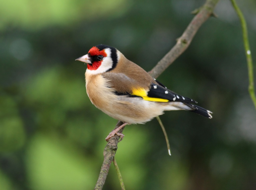

In [5]:
im = Image.open(dest)
im.to_thumb(256,256)

In [6]:
!pwd

/Users/lalitmanchanda/FastAiCourse


In [10]:
searches = 'forest','bird'
path = Path('bird_or_not')
if not path.exists():
            path.mkdir(exist_ok=False)
            for o in searches:
                dest = (path/o)
                dest.mkdir(exist_ok=True)
                results = search_images_ddg(f'{o} photo')
                download_images(dest,urls=results[:200])
                resize_images(dest,max_size=400,dest=dest)

In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

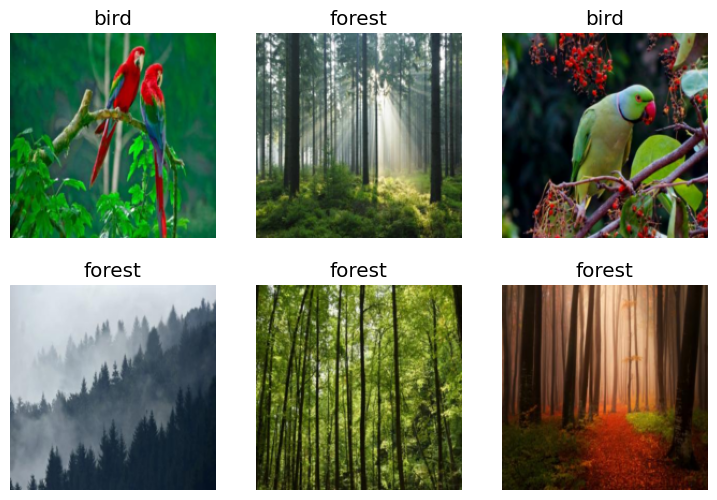

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [20]:
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

NameError: name 'resnet52' is not defined

In [17]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a:{is_bird}.")
print(f"Probability its a bird : {probs[0]:.4f}")

This is a:bird.
Probability its a bird : 1.0000
